In [ ]:
!pip install pandas textblob wordcloud matplotlib seaborn nrclex
!python -m textblob.download_corpora

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=ba88e884cd4bace018dee7c75f4f8adc20ab99c99cd4ee02620f5b8873817ba4
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nlt

In [ ]:
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nrclex import NRCLex

In [ ]:
# 1. Load Data
df = pd.read_csv("Instagram data.csv", encoding="ISO-8859-1")

In [ ]:
# 2. Clean Captions
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", '', text)  # URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Extra spaces
    return text

df['clean_caption'] = df['Caption'].apply(clean_text)

In [ ]:
# 3. Sentiment Classification
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_caption'].apply(get_sentiment)

In [ ]:
# 4. Emotion Detection
def detect_emotion(text):
    emo = NRCLex(text).top_emotions
    return emo[0][0] if emo else 'neutral'

df['emotion'] = df['clean_caption'].apply(detect_emotion)

/tmp/ipython-input-13-3823125409.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


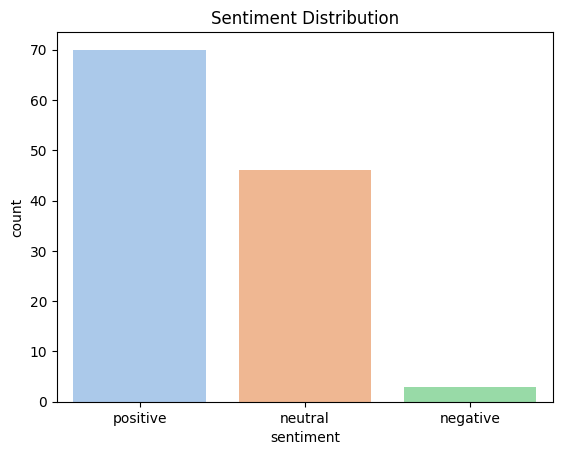

/tmp/ipython-input-13-3823125409.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', palette='muted')


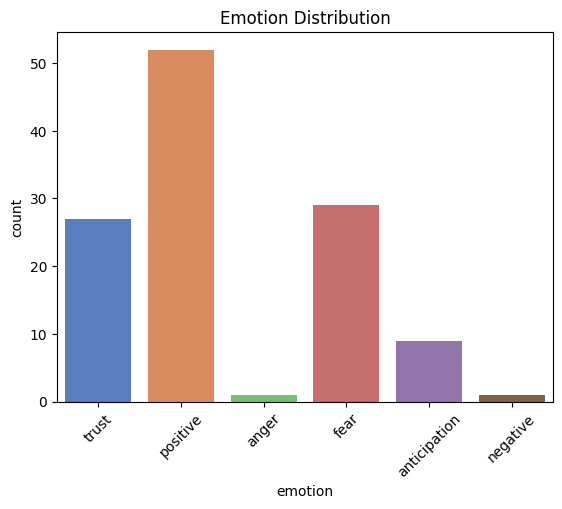

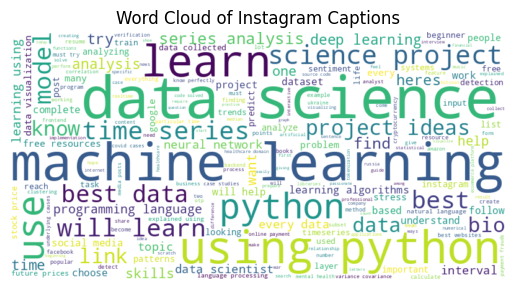

In [ ]:
# 5. Visualizations

# Sentiment Distribution
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.show()

# Emotion Distribution
sns.countplot(data=df, x='emotion', palette='muted')
plt.title("Emotion Distribution")
plt.xticks(rotation=45)
plt.show()

# Word Cloud of Captions
all_text = ' '.join(df['clean_caption'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Instagram Captions")
plt.show()

In [ ]:
# 6. Export Results
df.to_csv("instagram_sentiment_emotion_analysis.csv", index=False)